In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as tdel
from matplotlib.dates import DateFormatter
import pathlib
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import sklearn

### Line Search Newton's Method

In [170]:
def f(x): return np.polyval([0.05, 0, 0.2, 0, 0], x) - 0.25 * np.sin(2 * x) + 1
def df(x): return np.polyval([0.2, 0, 0.4, 0], x) - 0.5 * np.cos(2 * x)
def d2f(x): return np.polyval([0.6, 0, 0.4], x) + 1 * np.sin(2 * x) 

In [186]:
def plot_func(ax, x_k):
    x = np.linspace(-6, 6, 1000)
    # Main function.
    ax.plot(x, f(x), lw=4, color="tab:blue", alpha=0.4)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-5, 25)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_position(('axes', -0.03))
    ax.spines['bottom'].set_position(('axes', -0.04))
    ax.set_title(r"$f(x) = 0.05 x^4 + 0.2x^2 - 0.25\sin (2x) + 1$", fontsize=16)

    # Quadrating approximation at xk
    _f, _df, _d2f = f(x_k[-2]), df(x_k[-2]), d2f(x_k[-2])
    ax.plot(x, np.polyval([0.5 * _d2f, _df, _f], (x - x_k[-2])), 'tab:red', lw=1)
    ax.axvline(x_k[-2], color='gray', linestyle='dotted', lw=1)
    ax.axvline(x_k[-1], color='gray', linestyle='dashed', lw=1)

    # Plot points
    ax.plot(x_k[-2], f(x_k[-2]), 'o', color='tab:green', markersize=8)
    ax.plot(x_k[-1], f(x_k[-1]), 's', color='tab:red', markersize=8)

    # Plot enite iteration history
    ax.plot(x_k, np.zeros(len(x_k)), 'o', color='black', markersize=5)

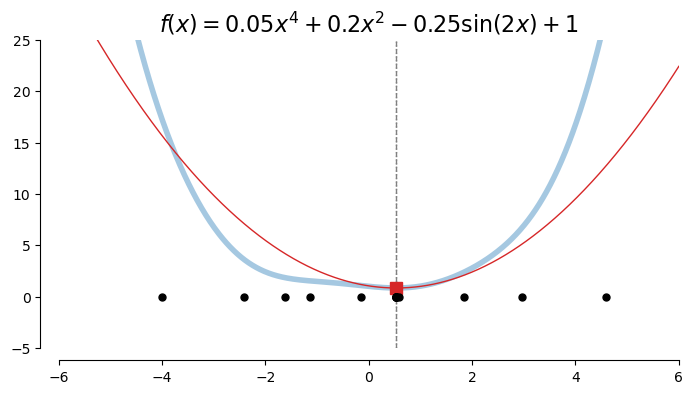

In [187]:
# Figure
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

# Newton's method iteration.
N = 100
xk = np.zeros(N)
xk[0] = -4
for k in range(1, N):
    xk[k] = xk[k-1] - df(xk[k-1]) / d2f(xk[k-1])

# Plot.
plot_func(ax, xk[:15])

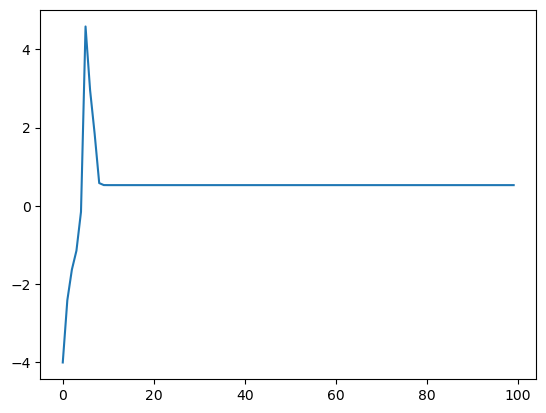

In [174]:
plt.plot(xk)